In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con

sys.path.append('/Users/jordanlee/Projects/SummerProject/ParticleSwarm')

import pso as pso

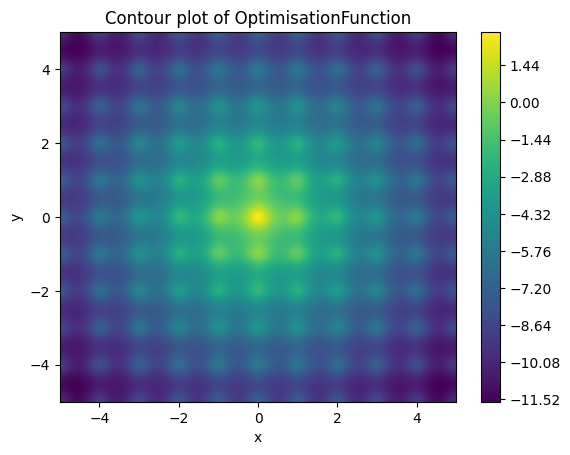

Maximum value of Z_mesh: 2.7182818284590446
Corresponding x value: 0.0
Corresponding y value: 0.0


In [2]:
def OptimisationFunction(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    for x in X:
        if x.any() <= -5 or x.any() >= 5:
            raise RuntimeError('Trying to sample function outside of bounds.')
    
    else:
        return - (-20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(0.5 * (np.cos(2 * con.pi * x1) + np.cos(2 * con.pi * x2))) + con.e + 20)

# Define grid for x and y
x_test = np.linspace(-5, 5, 501, endpoint=True)  # Extended range to see more variation
y_test = np.linspace(-5, 5, 501, endpoint=True)

# Create meshgrid
X_mesh, Y_mesh = np.meshgrid(x_test, y_test)

# Flatten the grid arrays and combine into a list of coordinates
X_flat = np.vstack([X_mesh.ravel(), Y_mesh.ravel()]).T

# Evaluate the function on the grid
Z = OptimisationFunction(X_flat)

# Reshape the result back into the shape of the meshgrid
Z_mesh = Z.reshape(X_mesh.shape)

# Plot the contour
plt.contourf(X_mesh, Y_mesh, Z_mesh, levels=500, cmap="viridis")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contour plot of OptimisationFunction")
plt.show()

# Step 2: Find the index of the minimum value in the Z_mesh array
max_index = np.argmax(Z_mesh)

# Step 3: Convert the flattened index back to 2D index
max_index_2d = np.unravel_index(max_index, Z_mesh.shape)

# Get the corresponding x and y values
max_x = X_mesh[max_index_2d]
max_y = Y_mesh[max_index_2d]
max_value = Z_mesh[max_index_2d]

# Print results
print(f"Maximum value of Z_mesh: {max_value}")
print(f"Corresponding x value: {max_x}")
print(f"Corresponding y value: {max_y}")

In [3]:
number_of_particles = 5
bounds = [[-5, 5], [-5, 5]]

species_1_hyperparameters = [0.6, 0.3, 0.5, 0]
species_2_hyperparameters = [0, 0, 0, 1]

hyper_parameter_sets = np.array([species_1_hyperparameters, species_2_hyperparameters])

species_probabilities = np.array([0.75, 0.25])

optimiser = pso.PSO(bounds, number_of_particles, hyper_parameter_sets, species_probabilities, maximise=True)

optimiser.InitialiseSwarm()
optimiser.Summary()

Particle: 0
Species: 0
Hyper-parameter Set: [0.6 0.3 0.5 0. ]
Position and velocity: [-1.85099137  4.44205563] [ -6.88612576 -12.3523792 ]
Position History: [array([-1.85099137,  4.44205563])]
Velcoity History: [array([ -6.88612576, -12.3523792 ])]
Y Value History []
Local Max and History -inf []
Local Max Position and History: None []


Particle: 1
Species: 1
Hyper-parameter Set: [0. 0. 0. 1.]
Position and velocity: [ 4.4051844  -0.48743826] [11.6862367  -7.96441283]
Position History: [array([ 4.4051844 , -0.48743826])]
Velcoity History: [array([11.6862367 , -7.96441283])]
Y Value History []
Local Max and History -inf []
Local Max Position and History: None []


Particle: 2
Species: 0
Hyper-parameter Set: [0.6 0.3 0.5 0. ]
Position and velocity: [1.26925118 1.68204413] [14.11644089  0.85211297]
Position History: [array([1.26925118, 1.68204413])]
Velcoity History: [array([14.11644089,  0.85211297])]
Y Value History []
Local Max and History -inf []
Local Max Position and History: None [

/Users/jordanlee/miniconda3/envs/py11/lib/python3.11/site-packages/scipy/stats/_qmc.py:804: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


In [4]:
iterations = 10
for i in range(iterations):
    X = optimiser.GetNextX()
    Y = OptimisationFunction(X)
    optimiser.UpdateOptimiser(Y)

# optimiser.Summary()

Maximum value of Z_mesh: 2.7182818284590446
Corresponding x value: 0.0
Corresponding y value: 0.0


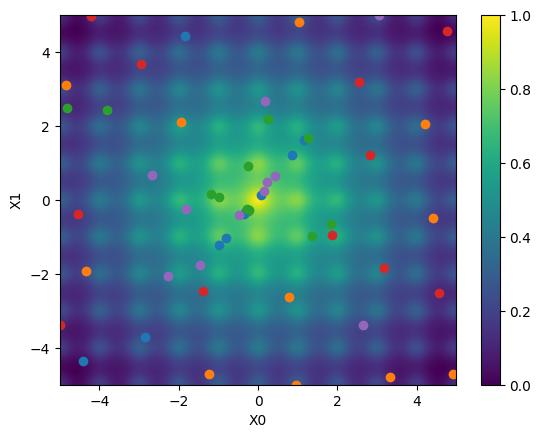

In [5]:
def OptimisationFunction(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    for x in X:
        if x.any() <= -5 or x.any() >= 5:
            raise RuntimeError('Trying to sample function outside of bounds.')
    
    else:
        return - (-20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(0.5 * (np.cos(2 * con.pi * x1) + np.cos(2 * con.pi * x2))) + con.e + 20)

# Define grid for x and y
x_test = np.linspace(bounds[0][0], bounds[0][1], 501, endpoint=True)  # Extended range to see more variation
y_test = np.linspace(bounds[1][0], bounds[1][1], 501, endpoint=True)

# Create meshgrid
X_mesh, Y_mesh = np.meshgrid(x_test, y_test)

# Flatten the grid arrays and combine into a list of coordinates
X_flat = np.vstack([X_mesh.ravel(), Y_mesh.ravel()]).T

# Evaluate the function on the grid
Z = OptimisationFunction(X_flat)

# Reshape the result back into the shape of the meshgrid
Z_mesh = Z.reshape(X_mesh.shape)

# Plot the contour
plt.contourf(X_mesh, Y_mesh, Z_mesh, levels=500, cmap="viridis")


# Scatter plot of points
for particle in optimiser.swarm.particles:
    plt.scatter(np.array(particle.position_history)[:,0], np.array(particle.position_history)[:,1])


plt.colorbar()
plt.xlabel("X0")
plt.ylabel("X1")


# Step 2: Find the index of the minimum value in the Z_mesh array
max_index = np.argmax(Z_mesh)

# Step 3: Convert the flattened index back to 2D index
max_index_2d = np.unravel_index(max_index, Z_mesh.shape)

# Get the corresponding x and y values
max_x = X_mesh[max_index_2d]
max_y = Y_mesh[max_index_2d]
max_value = Z_mesh[max_index_2d]

# Print results
print(f"Maximum value of Z_mesh: {max_value}")
print(f"Corresponding x value: {max_x}")
print(f"Corresponding y value: {max_y}")

Global Max: 0.005121262225419088
Global Max Position: [-0.22993581 -0.27325036]


Text(0.5, 0, 'Iteration #')

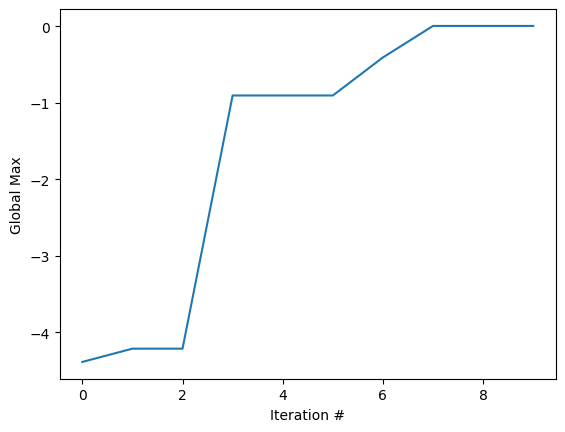

In [6]:
plt.plot(optimiser.swarm.global_max_history)
print('Global Max:', optimiser.swarm.global_max)
print('Global Max Position:', optimiser.swarm.global_max_position)

plt.ylabel('Global Max')
plt.xlabel('Iteration #')

Text(0.5, 0, 'Iteration #')

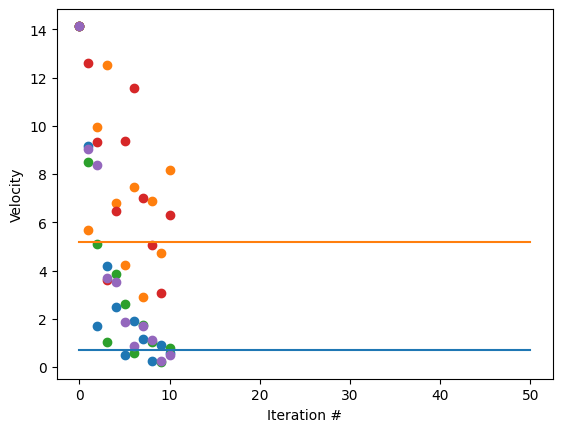

In [7]:
for particle in optimiser.swarm.particles:
    plt.scatter(range(optimiser.iteration + 1), np.linalg.norm(particle.velocity_history, axis=1))

plt.plot([0, 50], [np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e**3, np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e**3])
plt.plot([0, 50], [np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e, np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e])

plt.ylabel('Velocity')
plt.xlabel('Iteration #')

Minimum value of Z_mesh: -11.584323599101698
Corresponding x value: -4.6
Corresponding y value: -4.6


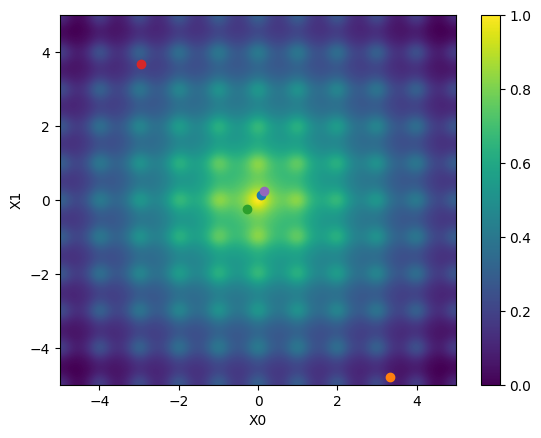

In [8]:
def OptimisationFunction(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    for x in X:
        if x.any() <= -5 or x.any() >= 5:
            raise RuntimeError('Trying to sample function outside of bounds.')
    
    else:
        return - (-20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(0.5 * (np.cos(2 * con.pi * x1) + np.cos(2 * con.pi * x2))) + con.e + 20)

# Define grid for x and y
x_test = np.linspace(-5, 5, 501, endpoint=True)  # Extended range to see more variation
y_test = np.linspace(-5, 5, 501, endpoint=True)

# Create meshgrid
X_mesh, Y_mesh = np.meshgrid(x_test, y_test)

# Flatten the grid arrays and combine into a list of coordinates
X_flat = np.vstack([X_mesh.ravel(), Y_mesh.ravel()]).T

# Evaluate the function on the grid
Z = OptimisationFunction(X_flat)

# Reshape the result back into the shape of the meshgrid
Z_mesh = Z.reshape(X_mesh.shape)

# Plot the contour
plt.contourf(X_mesh, Y_mesh, Z_mesh, levels=500, cmap="viridis")


# Scatter plot of points
for particle in optimiser.swarm.particles:
    plt.scatter(np.array(particle.position_history)[-1,0], np.array(particle.position_history)[-1,1])


plt.colorbar()
plt.xlabel("X0")
plt.ylabel("X1")
# Step 2: Find the index of the minimum value in the Z_mesh array
min_index = np.argmin(Z_mesh)

# Step 3: Convert the flattened index back to 2D index
min_index_2d = np.unravel_index(min_index, Z_mesh.shape)

# Get the corresponding x and y values
min_x = X_mesh[min_index_2d]
min_y = Y_mesh[min_index_2d]
min_value = Z_mesh[min_index_2d]

# Print results
print(f"Minimum value of Z_mesh: {min_value}")
print(f"Corresponding x value: {min_x}")
print(f"Corresponding y value: {min_y}")

Minimum value of Z_mesh: -50.0
Corresponding x value: -5.0
Corresponding y value: -5.0


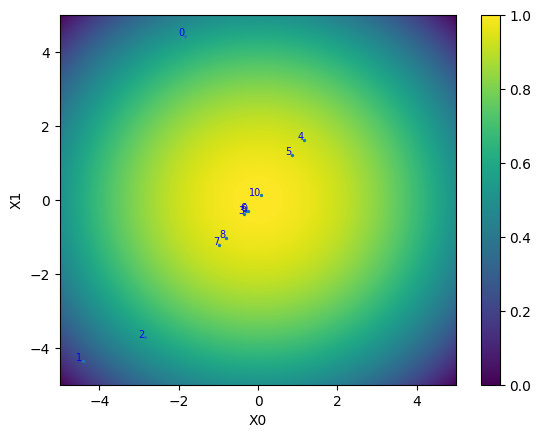

In [9]:
def OptimisationFunction(X):
    x = X[:, 0]
    y = X[:, 1]
    if x.any() <= -5 or x.any() >= 5:
        raise RuntimeError('Trying to sample function outside of bounds.')
    
    else:
        return - (x**2.0 + y**2.0)

# Define grid for x and y
x_test = np.linspace(-5, 5, 101, endpoint=True)  # Extended range to see more variation
y_test = np.linspace(-5, 5, 101, endpoint=True)

# Create meshgrid
X_mesh, Y_mesh = np.meshgrid(x_test, y_test)

# Flatten the grid arrays and combine into a list of coordinates
X_flat = np.vstack([X_mesh.ravel(), Y_mesh.ravel()]).T

# Evaluate the function on the grid
Z = OptimisationFunction(X_flat)

# Reshape the result back into the shape of the meshgrid
Z_mesh = Z.reshape(X_mesh.shape)

# Plot the contour
plt.contourf(X_mesh, Y_mesh, Z_mesh, levels=500, cmap="viridis")


# Scatter plot of points
particle = optimiser.swarm.particles[0]
plt.scatter(np.array(particle.position_history)[:,0], np.array(particle.position_history)[:,1], s=2)
for i, (x, y) in enumerate(particle.position_history, start=0):  # start=1 to start labels from 1
    plt.text(x, y, str(i), fontsize=7, ha='right', color='blue')  # Add custom color or adjust as needed



plt.colorbar()
plt.xlabel("X0")
plt.ylabel("X1")
# Step 2: Find the index of the minimum value in the Z_mesh array
min_index = np.argmin(Z_mesh)

# Step 3: Convert the flattened index back to 2D index
min_index_2d = np.unravel_index(min_index, Z_mesh.shape)

# Get the corresponding x and y values
min_x = X_mesh[min_index_2d]
min_y = Y_mesh[min_index_2d]
min_value = Z_mesh[min_index_2d]

# Print results
print(f"Minimum value of Z_mesh: {min_value}")
print(f"Corresponding x value: {min_x}")
print(f"Corresponding y value: {min_y}")